<a href="https://colab.research.google.com/github/ChrisDieck/food-sales-predictions/blob/main/food_sales_predictionswk3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [88]:
filename = '/content/drive/MyDrive/02 Week 2: Pandas/Coding Data/sales_predictions.csv'
df = pd.read_csv(filename)

In [89]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# 1) How many rows and columns?

In [90]:
df.shape #there are 8523 rows and 12 columns

(8523, 12)

# 2) What are the datatypes of each variable?

In [91]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# 3) Are there duplicates? If so, drop any duplicates.

In [92]:
df.duplicated().sum() #there are no duplicates
df= df.drop(columns= ['Outlet_Identifier', 'Item_Identifier', 'Outlet_Establishment_Year'])
# also dropping unneccessary columns

# 4) Identify missing values.

In [93]:
df.isna().sum() #Item_Weight and Outlet_Size are the only columns with missing values

Item_Weight             1463
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
dtype: int64

# To Fill Missing Values in 'Item_Weight'

In [94]:
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [95]:
df['Item_Weight'].median()

12.6

In [96]:
#filling missing item weights with the average item weight because I do not think it will be very
#indicative of sales_predictions
average_item_weight = df['Item_Weight'].mean()
df['Item_Weight'].fillna(average_item_weight, inplace = True)
df.isna().sum()

Item_Weight                0
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
dtype: int64

# To Fill Missing Values for 'Outlet_Size'

In [97]:
#checking for most common size
df['Outlet_Size'].value_counts('')

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [98]:
#imputing missing values with the most common size until further research can be done
df['Outlet_Size'].fillna('Medium', inplace=True)

In [99]:
#there are no more missing values
df.isna().sum()

Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
dtype: int64

# 7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent)

In [100]:
#to see which categories I should look at
df.nunique()

Item_Weight              416
Item_Fat_Content           5
Item_Visibility         7880
Item_Type                 16
Item_MRP                5938
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
Item_Outlet_Sales       3493
dtype: int64

In [101]:
#checking the names of the 'Item_Type' column
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [102]:
#checking the names of the 'Outlet_Type' column
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [103]:
#found inconsistent value types
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [104]:
#consolidated inconsistent value types into 2 main types (Low Fat and Regular)
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF','Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat','Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg','Regular')

In [105]:
#checking results
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# 8) For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [106]:
#need summary stats of Item_Weight, Item_Visibility, Item_MRP, and Item_Outlet_Sales because they are floats
df.dtypes

Item_Weight             float64
Item_Fat_Content         object
Item_Visibility         float64
Item_Type                object
Item_MRP                float64
Outlet_Size              object
Outlet_Location_Type     object
Outlet_Type              object
Item_Outlet_Sales       float64
dtype: object

In [107]:
#summary stats of numerical columns
dfnum = df[['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']] #consolidating all numerical columns
dfnum.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.226124,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,9.310000,0.026989,93.826500,834.247400
50%,12.857645,0.053931,143.012800,1794.331000
75%,16.000000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


# Summary Statistics

In [199]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052


### Histograms showing the frequency of each nominal column

Outlet Type

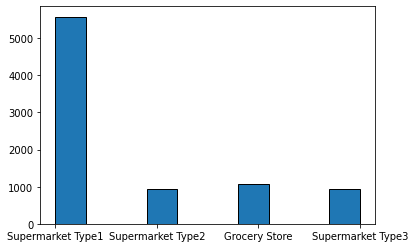

In [161]:
plt.hist(df['Outlet_Type'],
         edgecolor = 'black');

Location Type

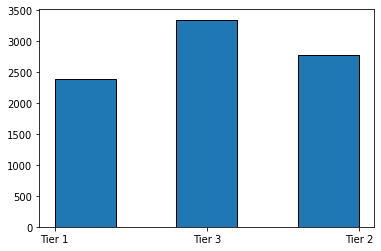

In [194]:
plt.hist(df['Outlet_Location_Type'],
         bins = 5,
         edgecolor = 'black');

Outlet Size

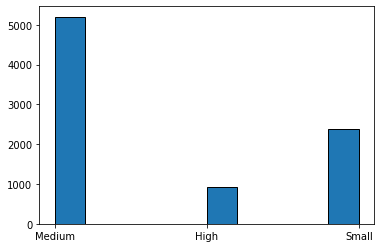

In [171]:
#this is skewed due to the missing values being filled with the 'Medium' value
plt.hist(df['Outlet_Size'],
         edgecolor = 'black');

Item Type

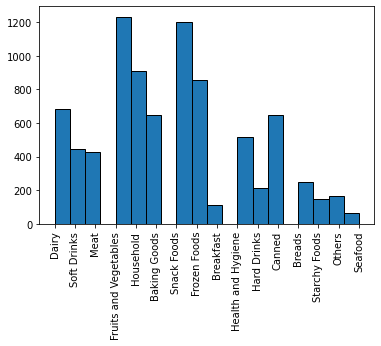

In [172]:
plt.hist(df['Item_Type'],
         bins = 20,        
         edgecolor = 'black')
plt.xticks(rotation = 90);

Fat Content

Text(0, 0.5, 'Frequency')

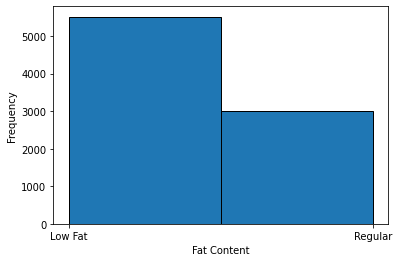

In [269]:
plt.hist(df['Item_Fat_Content'],
         bins = 2,
         edgecolor = 'black')
plt.xlabel('Fat Content')
plt.ylabel('Frequency')

## Boxplots for Nominal-Numerical Data

### Outlet Type and Sales

Boxplot showing the sales distribution for Outlet Types

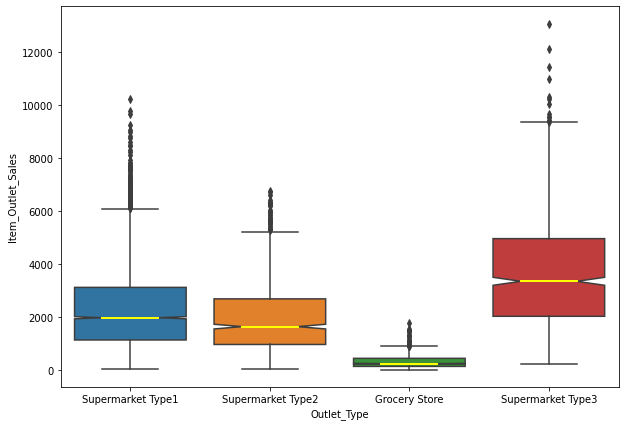

In [255]:
fig, axes = plt.subplots(figsize = (10,7))
boxplots = sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df,
                       notch = True,
                       medianprops = dict(linestyle='-',linewidth=2,color='Yellow'))

### Location Type and Sales

Boxplot showing the sales distribution for Outlet Location Types

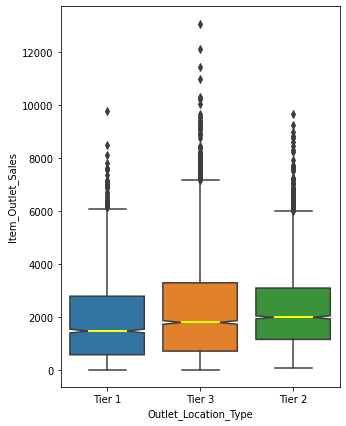

In [257]:
fig, axes = plt.subplots(figsize = (5,7))
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df,
            notch = True,
            medianprops = dict(linestyle='-',linewidth=2,color='Yellow'));

### Outlet Size and Sales

Boxplot showing the sales distribution for Outlet Sizes

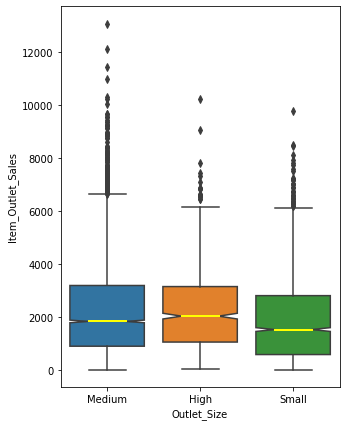

In [260]:
fig, axes = plt.subplots(figsize = (5,7))
boxplots = sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df,
                       notch = True,
                       medianprops = dict(linestyle='-',linewidth=2,color='Yellow'))

### Item Type and Sales

Boxplot showing the sales distribution for Outlet Sizes

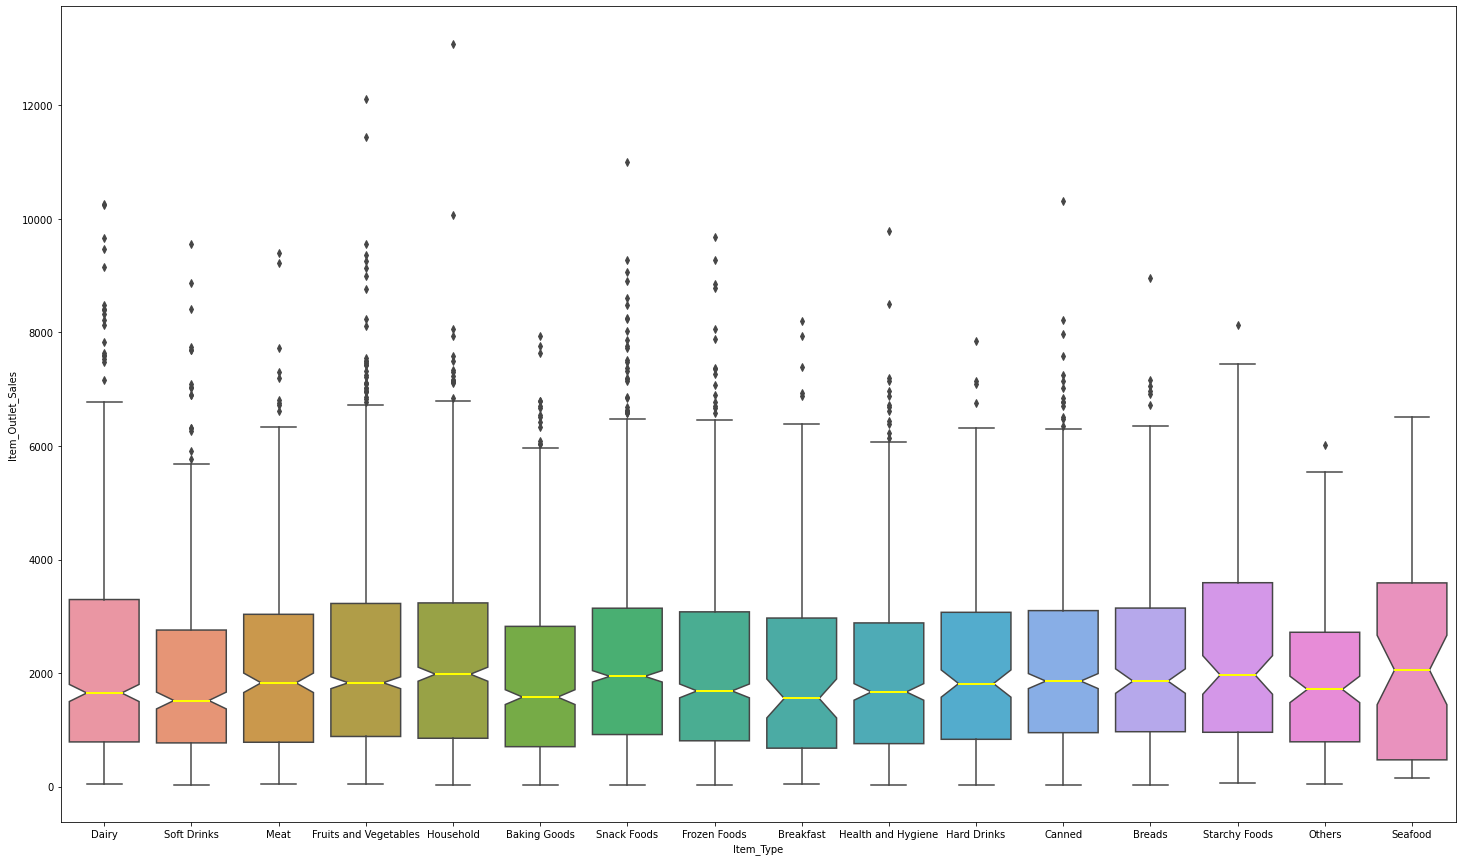

In [293]:
fig, axes = plt.subplots(figsize = (25,15))
boxplots = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=df,
                       notch = True,
                       medianprops = dict(linestyle='-',linewidth=2,color='Yellow'))

Bar Chart of Sales for each Item Type

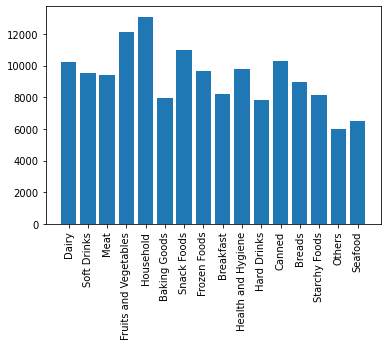

In [303]:
plt.bar(df['Item_Type'],df['Item_Outlet_Sales'])
plt.xticks(rotation = 90);

### Fat Content and Sales

Boxplot showing the sales distribution for Fat Content

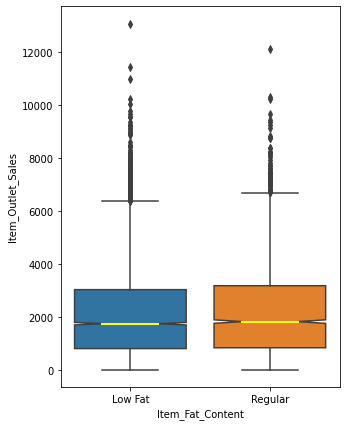

In [298]:
fig, axes = plt.subplots(figsize = (5,7))
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df,
            notch = True,
            medianprops = dict(linestyle='-',linewidth=2,color='Yellow'));

## Scatter Plots for Numerical-Numerical Data

### Item MRP and Sales

Scatter Plot showing Sales as Item MRP increases



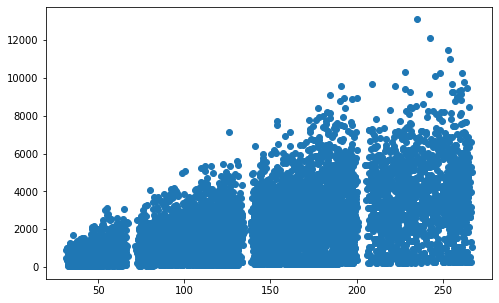

In [301]:
fig, axes = plt.subplots(figsize = (8,5))
plt.scatter(df['Item_MRP'],df['Item_Outlet_Sales'])

### Item Visibility and Sales

Scatter Plot showing Sales as Item Visibility increases

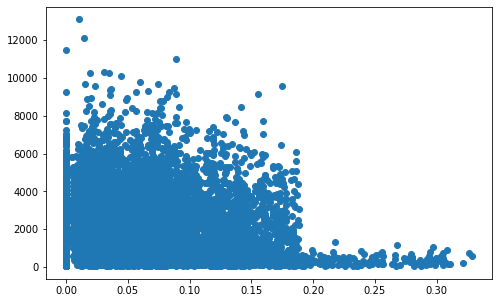

In [306]:
fig, axes = plt.subplots(figsize = (8,5))
plt.scatter(df['Item_Visibility'],df['Item_Outlet_Sales']);

In [45]:
df.groupby('Item_Weight')['Item_Outlet_Sales'].mean() #boxplot

Item_Weight
4.555     1761.706800
4.590     1267.683200
4.610     1993.595429
4.615     4078.025000
4.635     2184.489800
             ...     
21.000    1194.778100
21.100    1851.472306
21.200    2763.735800
21.250    2199.192883
21.350    3391.490086
Name: Item_Outlet_Sales, Length: 416, dtype: float64

### Item_Weight and Sales

Scatter Plot showing Sales as Item Weight increases

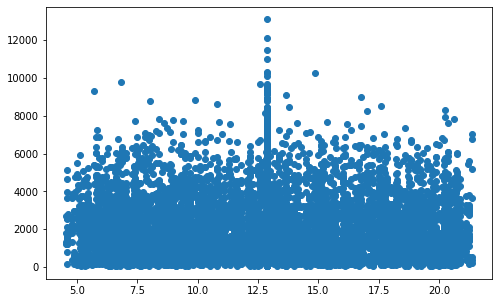

In [307]:
#skewed because missing values were imputed with median value
fig, axes = plt.subplots(figsize = (8,5))
plt.scatter(df['Item_Weight'],df['Item_Outlet_Sales']);

## Correlations

Heatmap to Show Correlations

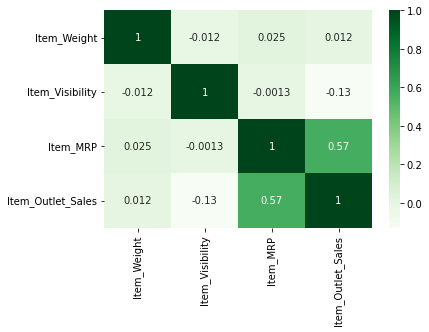

In [66]:
#to show the correlations between the numerical data
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True);

Item MRP is the only column that has at least a moderate correlation to Sales. Everything else seems to have a weak positive correlation except for Item Visibility, which has a weak negative correlation with each column.